In [22]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

# EXAMPLE 1

In [23]:
import gym
import minihack
from minihack import LevelGenerator
from minihack import RewardManager
# Define a 10x10 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=10, h=10)
lvl_gen.add_object("apple", "%")
lvl_gen.add_object("dagger", ")")
lvl_gen.add_trap(name="teleport")
lvl_gen.add_sink()
lvl_gen.add_monster("goblin")
lvl_gen.fill_terrain("rect", "L", 0, 0, 9, 9)
# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
reward_manager.add_eat_event("apple")
reward_manager.add_wield_event("dagger")
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
reward_manager.add_location_event("sink", reward=-1, terminal_required=False)
env = gym.make(
"MiniHack-Skill-Custom-v0",
des_file=lvl_gen.get_des(),
reward_manager=reward_manager,
observation_keys=("chars", "pixel")
)


In [28]:
state = env.reset()

In [29]:
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  }}}}}}}}}}                                    
                                  }........}                                    
                                  })......%}                                    
                                  }.......@}                                    
                           

In [30]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

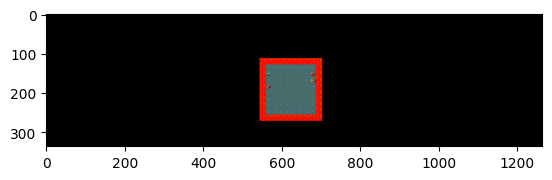

In [31]:
plt.imshow(state['pixel'])

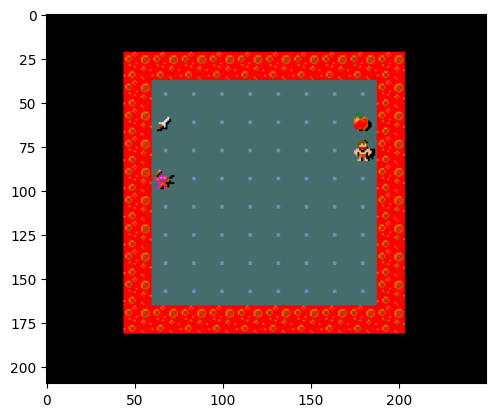

In [34]:
plt.imshow(state['pixel'][90:300, 500:750])

In [35]:
env.step(0)

({'chars': array([[32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         ...,
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32]], dtype=uint8),
  'pixel': array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 

In [36]:
env.render()


You see here an apple.                                                          
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  }}}}}}}}}}                                    
                                  }........}                                    
                                  })......@}                                    
                                  }.......<}                                    
                           

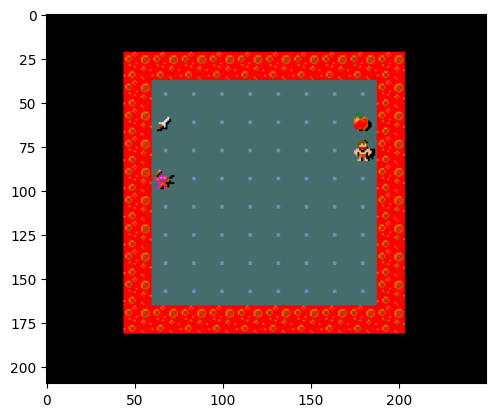

In [37]:
plt.imshow(state['pixel'][90:300, 500:750])

# EXAMPLE 2

In [6]:
from minihack import LevelGenerator
# Define the maze as a string
maze = """
--------------------
|.......|.|........|
|.-----.|.|.-----|.|
|.|...|.|.|......|.|
|.|.|.|.|.|-----.|.|
|.|.|...|....|.|.|.|
|.|.--------.|.|.|.|
|.|..........|...|.|
|.|--------------|.|
|..................|
--------------------
"""
# Set a start and goal positions
lvl_gen = LevelGenerator(map=maze)
lvl_gen.set_start_pos((9, 1))
lvl_gen.add_goal_pos((14, 5))
# Add a Minotaur at fixed position
lvl_gen.add_monster(name="minotaur",place=(19, 9))
# Add wand of death
lvl_gen.add_object("death", "/")
env = gym.make(
"MiniHack-Skill-Custom-v0",
des_file = lvl_gen.get_des(),
)


In [52]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "my_des.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                -------------                                   
                                |..........>|                                   
                                |------.....|                                   
                                |@....|}..}.|                                   
                           